In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorrt
import matplotlib.pyplot as plt
import numpy as np

2023-07-18 18:13:40.422789: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 18:13:41.243253: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print(tf.version.VERSION)

2.12.0


In [3]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [6]:
print("Let's check the shape of the dataset.")
print("X_train: ", X_train.shape, " y_train: ", y_train.shape)
print("X_test:  ", X_test.shape, " y_test:  ", y_test.shape)

Let's check the shape of the dataset.
X_train:  (50000, 32, 32, 3)  y_train:  (50000, 1)
X_test:   (10000, 32, 32, 3)  y_test:   (10000, 1)


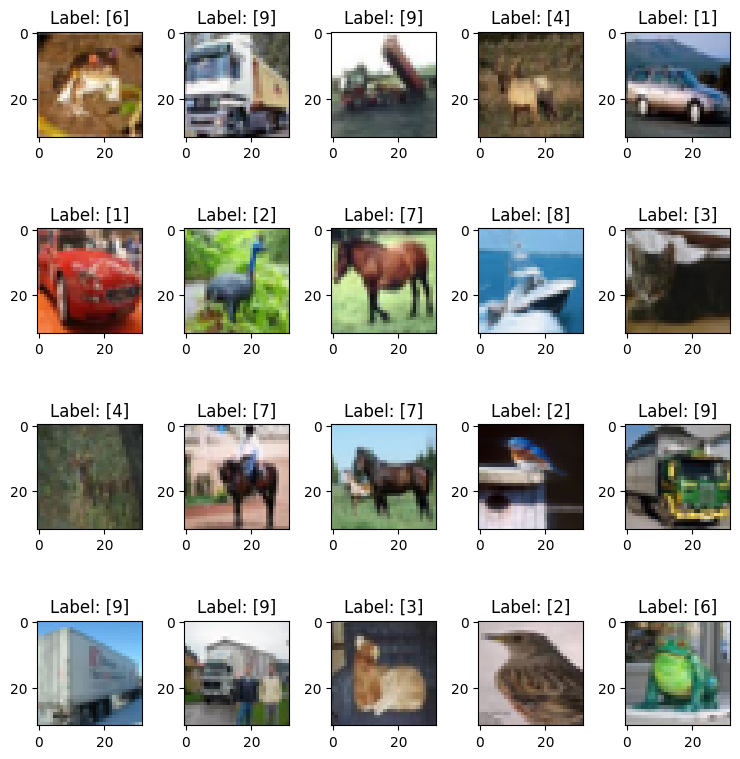

In [7]:
def data_display():
    num_row = 4
    num_col = 5
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(20):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(X_train[i], cmap='gray')
        ax.set_title('Label: {}'.format(y_train[i]))
    plt.tight_layout()
    plt.show()

data_display()

In [8]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [11]:
print(y_train.shape, '\ny_train: \n', y_train)

(50000, 1) 
y_train: 
 [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [12]:
y_train = y_train.reshape(-1,)
print(y_train.shape, '\ny_train: \n', y_train)

(50000,) 
y_train: 
 [6 9 9 ... 9 1 1]


In [13]:
y_test = y_test.reshape(-1,)
y_test.shape

(10000,)

In [14]:
# Feature Scaling
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [15]:
# One hot encoding y
def encoder(y, num):
    return keras.utils.to_categorical(y, num_classes=num, dtype='float32')
y_train_categorical = encoder(y_train, 10)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
y_test_categorical = encoder(y_test, 10)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

### Building Model

In [17]:
from keras import Sequential
from keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(units = 3000, activation='relu'),
    Dense(units = 1000, activation='relu'),
    Dense(units = 250, activation='relu'),
    Dense(units = 10, activation='sigmoid')
])

model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs = 40)

2023-07-18 18:21:46.460764: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2084 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
2023-07-18 18:21:47.143600: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2023-07-18 18:21:47.563801: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/40


2023-07-18 18:21:49.472008: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-18 18:21:49.494070: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f377b9cf500 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-18 18:21:49.494095: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-07-18 18:21:49.690849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-18 18:21:49.866661: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 10s 5ms/step - loss: 1.8160 - accuracy: 0.3487
Epoch 2/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6226 - accuracy: 0.4233
Epoch 3/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5376 - accuracy: 0.4553
Epoch 4/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4732 - accuracy: 0.4777
Epoch 5/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4229 - accuracy: 0.4949
Epoch 6/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3749 - accuracy: 0.5130
Epoch 7/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3346 - accuracy: 0.5273
Epoch 8/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2964 - accuracy: 0.5416
Epoch 9/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2597 - accuracy: 0.5535
Epoch 10/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2278 - accura

  1/313 [..............................] - ETA: 20s

2023-07-18 18:28:00.232234: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2023-07-18 18:28:00.351319: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step


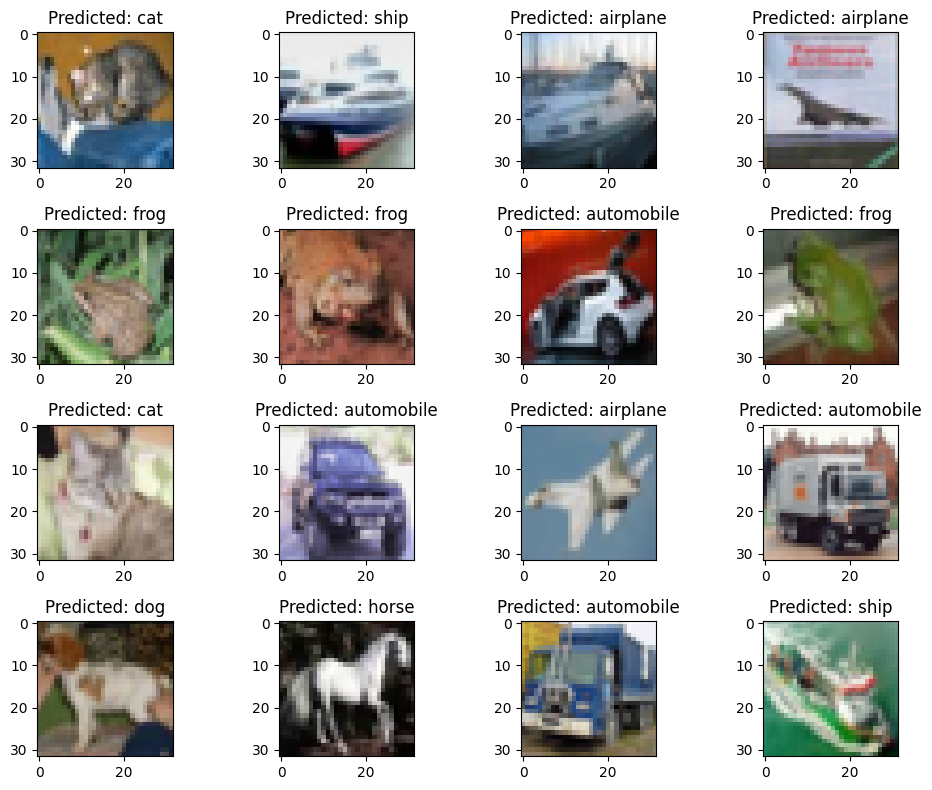

In [18]:
# Let us check our predictions

num_row = 4
num_col = 4

y_pred = model.predict(X_test_scaled)
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_test[i])
    ax.set_title('Predicted: {}'.format(classes[np.argmax(y_pred[i])]))
plt.tight_layout()
plt.show()

In [19]:
model.evaluate(X_test_scaled, y_test_categorical)

  1/313 [..............................] - ETA: 31s - loss: 0.7104 - accuracy: 0.7500

2023-07-18 18:28:07.154217: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 1.7795 - accuracy: 0.5388


[1.7794991731643677, 0.5388000011444092]

Text(95.72222222222221, 0.5, 'Truth')

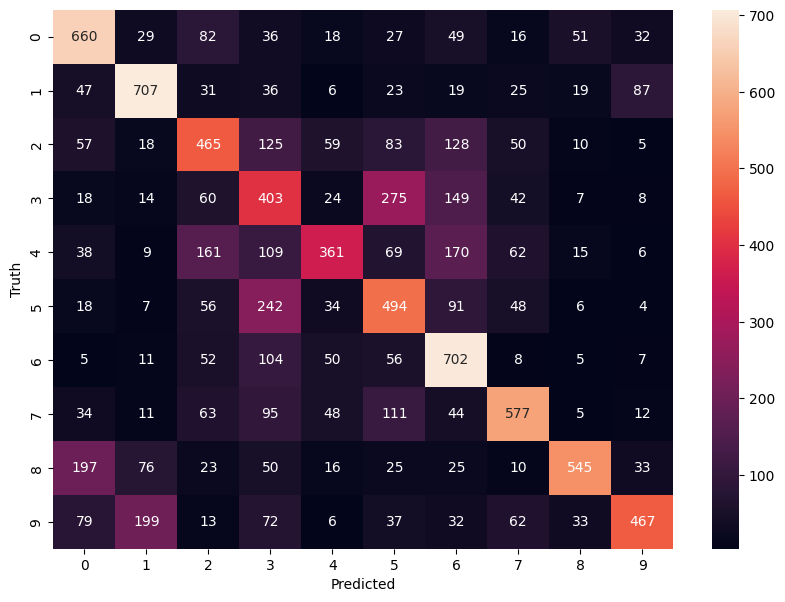

In [20]:
predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## We can see that our ANN model doesn't perform well on our test set, it is overfitting. Let's create a better model using convolution layers. 

In [21]:
from keras.layers import Conv2D, MaxPooling2D

model_cnn = Sequential([
    # CNN layers
    Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    # Dense Layers
    Flatten(),
    Dense(75, activation='relu'),
    Dense(10, activation='softmax')
])


In [22]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 75)               

In [23]:
model_cnn.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs_cnn')
hist = model_cnn.fit(X_train_scaled, y_train_categorical, epochs=10, validation_data=(X_test_scaled, y_test_categorical), callbacks=[tensorboard_callback])

Epoch 1/10


2023-07-18 18:43:01.319931: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1563/1563 [==============================] - 12s 7ms/step - loss: 1.4685 - accuracy: 0.4691 - val_loss: 1.2198 - val_accuracy: 0.5631
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1245 - accuracy: 0.6066 - val_loss: 1.0819 - val_accuracy: 0.6211
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9814 - accuracy: 0.6579 - val_loss: 1.0178 - val_accuracy: 0.6472
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8856 - accuracy: 0.6915 - val_loss: 0.9710 - val_accuracy: 0.6706
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8140 - accuracy: 0.7172 - val_loss: 0.9330 - val_accuracy: 0.6802
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7526 - accuracy: 0.7388 - val_loss: 0.9176 - val_accuracy: 0.6915
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6964 - accuracy: 0.7582 - val_loss: 0.9377 - val_accuracy: 0.685

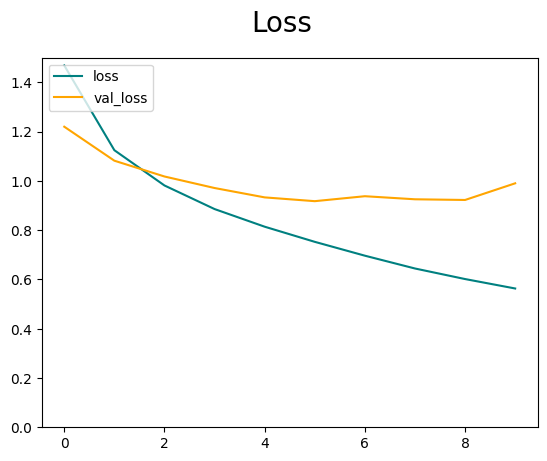

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.ylim([0,1.5])
plt.show()

In [33]:
model_cnn.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 0.9901 - accuracy: 0.6936


[0.9901343584060669, 0.6935999989509583]

### We can see that our test accuracy is much better than before. 

313/313 [==============================] - 1s 2ms/step


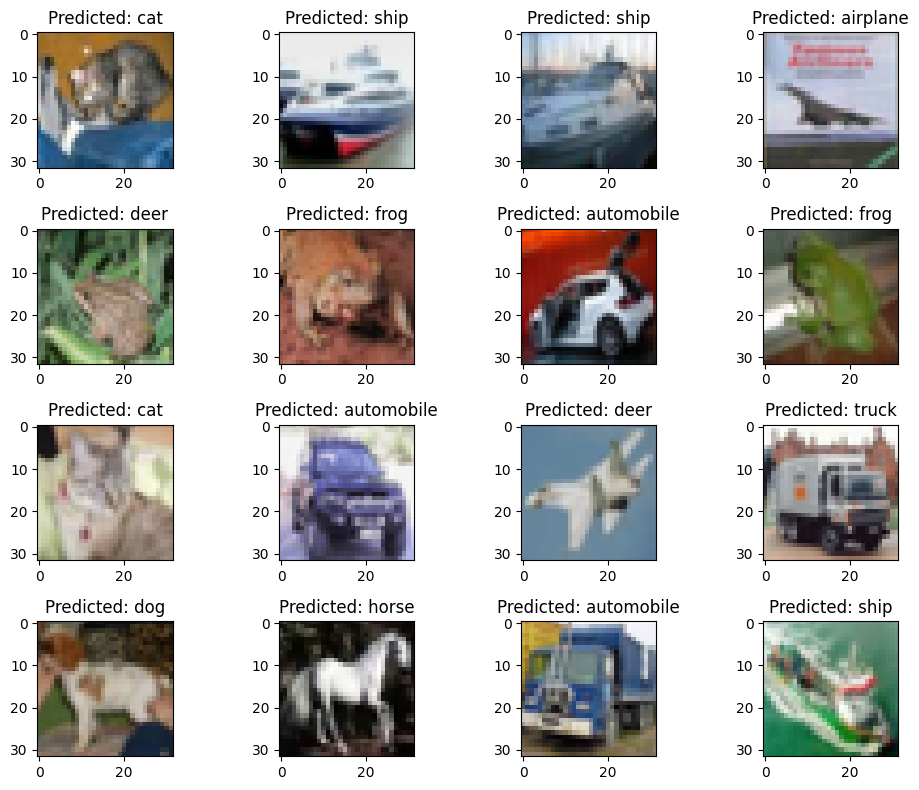

In [35]:
# Let us check our predictions

num_row = 4
num_col = 4

y_pred = model_cnn.predict(X_test_scaled)
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_test[i])
    ax.set_title('Predicted: {}'.format(classes[np.argmax(y_pred[i])]))
plt.tight_layout()
plt.show()